# 환경부 보도자료 분석 (튜토리얼 형태 Ver)

## 관련 라이브러리 import
- https://github.com/lovit/customized_konlpy
- pip install customized_konlpy
- pip install textrankr

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import re
import gensim 
import mglearn
import numpy as np
import pandas as pd
import os
from konlpy.utils import pprint
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim
import pyLDAvis.sklearn
import collections
from konlpy.tag import Kkma

C:\Users\NFSI172\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\NFSI172\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
from ckonlpy.tag import Twitter

In [4]:
from gensim.models.word2vec import Word2Vec
#from eunjeon import Mecab  # KoNLPy style mecab wrapper
import copy
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

C:\Users\NFSI172\Anaconda3\lib\site-packages\networkx\classes\reportviews.py:95: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable


In [5]:
from textrankr import TextRank

In [6]:
# 명사인식
import soynlp
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

plt.rc('font', family='NanumBarunGothicOTF')

## 인덱스 파일 로드 
- ./data/indexing.txt : 인덱싱 파일
- ./data/*.txt : 그외 파일은 기사 제목 및 내용

In [23]:
import os
import glob
os.chdir('../data/') # 폴더를 변경하는 명령
os.listdir('.')      # 폴더내 모든 파일을 보여주는 명령(아래 보면 필요없는 '조상' 엑셀도 보여줌)
files = glob.glob('New*.xlsx') # 내가 필요한 파일만 선택하여 files라는 변수로 저장
files

['NewsResult_20170101-20170625.xlsx',
 'NewsResult_20170626-20180109.xlsx',
 'NewsResult_20180110-20180718.xlsx',
 'NewsResult_20180719-20190104.xlsx',
 'NewsResult_20190105-20190624.xlsx',
 'NewsResult_20190625-20191116.xlsx',
 'NewsResult_20191117-20200327.xlsx',
 '조상.xlsx']

['NewsResult_20170101-20170625.xlsx',
 'NewsResult_20170626-20180109.xlsx',
 'NewsResult_20180110-20180718.xlsx',
 'NewsResult_20180719-20190104.xlsx',
 'NewsResult_20190105-20190624.xlsx',
 'NewsResult_20190625-20191116.xlsx',
 'NewsResult_20191117-20200327.xlsx']

In [13]:
row_sum = 0
df=pd.DataFrame()

for file_name in files :
    pd.read_excel(file_name).shape
    pd.read_excel(file_name).columns
    df = df.append(pd.read_excel(file_name))
    row_sum = row_sum + df.shape[0]
    
row_sum    
df.shape

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

(17362, 19)

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

(20000, 19)

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

(20000, 19)

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

(20000, 19)

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

(20000, 19)

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

(20000, 19)

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

(19993, 19)

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\NFSI172\Anaconda3\lib

541527

(137355, 19)

In [28]:
df = df[['일자', '언론사', '키워드', '본문']]
df.to_pickle('../data/df.pkl')

In [8]:
dir_path = './data/'

idx_result_df = pd.read_csv(dir_path + 'indexing.txt', encoding="UTF8", header=None)
idx_result_df.columns = ['date','title','content_url_list','file_list']

# 인덱스 파일 날짜로 정렬
idx_result_df = idx_result_df.sort_values('date')

idx_result_df.head()
idx_result_df.shape

,date,title,content_url_list,file_list
0,2005-01-03,“분묘훼손 멧돼지”를 「유해조수」로 추가 지정,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050104_1.txt
1,2005-01-03,「수도권 대기환경개선에 관한 특별법 시행규칙」 제정,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050105_1.txt
2,2005-01-03,음식물류 폐기물 직매립 금지 시행 3일째,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050106_2.txt
3,2005-01-04,기후변화와 기업의 대응에 관한 세미나 개최,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050106_1.txt
4,2005-01-05,환경부 9급 국가공무원 필기시험 대상자 및 시험장소 공고,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050107_2.txt


(10100, 4)

In [9]:
idx_result_df[idx_result_df.duplicated(subset=['date','title'])]
idx_result_df.shape

,date,title,content_url_list,file_list
566,2006-02-20,국립환경과학원에서 2005년도에 수행한 연구사업 관련 요약 자료,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20060220_2.txt
568,2006-02-21,국립환경과학원에서 2005년도에 수행한 연구사업 관련 요약 자료,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20060221_2.txt
574,2006-02-22,국립환경과학원에서 2005년도에 수행한 연구사업 관련 요약 자료,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20060222_2.txt
578,2006-02-23,국립환경과학원에서 2005년도에 수행한 연구사업 관련 요약 자료,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20060223_5.txt
2164,2008-07-28,인사발령 보도자료,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20080728_3.txt
4032,2010-12-01,인사발령 보도자료,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20101201_3.txt
4461,2011-06-10,"‘캠프 캐롤 고엽제 매립 의혹’ 관련, 기지 내외의 한미공동조사...",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20110610_3.txt
4572,2011-07-15,"‘캠프 캐롤 고엽제 매립 의혹’ 관련, 기지 내외의 한미공동조사...",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20110715_1.txt
4741,2011-10-11,우리 녹색성장 브랜드 수출 본격화,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20111011_4.txt
4973,2012-01-31,구제역 매몰지 4/4분기 지하수 수질조사 결과 “침출수 영향 없음”,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20120131_3.txt


(10100, 4)

In [10]:
# 제목이 같은 항목 삭제 및 마지막 레코드만 남김
idx_result_df = idx_result_df.drop_duplicates(subset=['date','title'], keep="last")

idx_result_df.head()

# 인덱스 파일 인덱스 정리
idx_result_df = idx_result_df.reset_index(drop=True)

idx_result_df.head()
idx_result_df.shape
#idx_result_df

,date,title,content_url_list,file_list
0,2005-01-03,“분묘훼손 멧돼지”를 「유해조수」로 추가 지정,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050104_1.txt
1,2005-01-03,「수도권 대기환경개선에 관한 특별법 시행규칙」 제정,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050105_1.txt
2,2005-01-03,음식물류 폐기물 직매립 금지 시행 3일째,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050106_2.txt
3,2005-01-04,기후변화와 기업의 대응에 관한 세미나 개최,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050106_1.txt
4,2005-01-05,환경부 9급 국가공무원 필기시험 대상자 및 시험장소 공고,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050107_2.txt


,date,title,content_url_list,file_list
0,2005-01-03,“분묘훼손 멧돼지”를 「유해조수」로 추가 지정,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050104_1.txt
1,2005-01-03,「수도권 대기환경개선에 관한 특별법 시행규칙」 제정,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050105_1.txt
2,2005-01-03,음식물류 폐기물 직매립 금지 시행 3일째,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050106_2.txt
3,2005-01-04,기후변화와 기업의 대응에 관한 세미나 개최,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050106_1.txt
4,2005-01-05,환경부 9급 국가공무원 필기시험 대상자 및 시험장소 공고,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20050107_2.txt


(10088, 4)

In [12]:
idx_result_df = idx_result_df.sample(frac=0.3)

## 결과저장 디렉토리 생성

In [11]:
dirname = './result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './noun_recognition'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')  
    
    
dirname = './lda_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './doc_trend_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './keyword_frequency_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './keyword_frequency_yearly_basis_result/'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')   

dirname = './keyword_trend_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './lda_stat'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')    

dirname = './lda_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './sentence_level_cowords'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './doc_level_cowords'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './w2v_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './filtered_sentence_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')    

dirname = './sentence_summary_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')  

##  형태소 분석기 설정 : Customized 트위터 분석기 사용함
- from ckonlpy.tag import Twitter : 명사 추가 기능이 추가된 트위터 분석기

In [30]:
twitter = Twitter()
#mecab = Mecab()

C:\Users\NFSI172\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [31]:
#twitter.pos('아버지가 방에 들어가신다.')
twitter.nouns('아버지가 방에 들어가신다.')
#mecab.pos('아버지가 방에 들어가신다')

['아버지', '방', '가신']

## 분석 범위 설정 1 : 날짜 필터링 

- 시작 날짜 및 끝 날짜 설정 필요

In [13]:
idx_result_df.head()
idx_result_df.info()

,date,title,content_url_list,file_list
4404,2011-05-25,누구나 쉽게 국립공원 이용할 수 있도록 탐방로 등급제 만든다,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20110525_3.txt
3601,2010-06-01,세계 생물권보전지역의 리더 대한민국,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20100603_3.txt
6340,2013-11-22,"환경공단-아프리카 물·위생환경기구, 환경협력 시동",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20131122_2.txt
543,2006-02-01,하수도 보급률 83%로 선진국 수준,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20060201_1.txt
5844,2013-03-05,"한국환경공단, 세계적 권위의 美 환경상 2년 연속 수상 !",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20130305_1.txt


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026 entries, 4404 to 7179
Data columns (total 4 columns):
date                3026 non-null object
title               3026 non-null object
content_url_list    3026 non-null object
file_list           3026 non-null object
dtypes: object(4)
memory usage: 118.2+ KB


In [14]:
# 시작 날짜 및 끝 날짜 설정
start_date = '2015-01-01'
end_date = '2018-12-31'

idx_result_df['date'] = pd.to_datetime(idx_result_df['date'])
# 날짜에 해당하는 인덱스 내용만 추출

dt_idx = (idx_result_df['date'] >= start_date) & (idx_result_df['date'] <= end_date)

dt_idx.value_counts()

False    2204
True      822
Name: date, dtype: int64

In [15]:
filtered_idx_result_df = idx_result_df.loc[dt_idx]
filtered_idx_result_df.head(3)

filtered_idx_result_df = filtered_idx_result_df.reset_index(drop=True) 
# reset_index 명령 사용시에 drop=True 로 설정하면 인덱스 열을 보통의 자료열로 올리는 것이 아니라 그냥 버리게 된다.
# index번호를 0 부터 순번으로 indexing하기 위해
filtered_idx_result_df.shape
filtered_idx_result_df.columns
filtered_idx_result_df.head(3)

,date,title,content_url_list,file_list
7460,2015-08-12,"환경과학원, 국민 몸속 환경오염물질 노출 수준 조사한다",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20150812_2.txt
9060,2017-12-22,겨울철 야영장…화재나 가스중독 사고 주의해야,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20171222_3.txt
7146,2015-02-25,"수질오염총량관리제, 2단계 마무리 짓고 3단계 논의",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20150225_1.txt


(822, 4)

Index(['date', 'title', 'content_url_list', 'file_list'], dtype='object')

,date,title,content_url_list,file_list
0,2015-08-12,"환경과학원, 국민 몸속 환경오염물질 노출 수준 조사한다",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20150812_2.txt
1,2017-12-22,겨울철 야영장…화재나 가스중독 사고 주의해야,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20171222_3.txt
2,2015-02-25,"수질오염총량관리제, 2단계 마무리 짓고 3단계 논의",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20150225_1.txt


## 분석 범위 설정 2 : 내용 기반 필터링
- 정규표현식 기반 문자열 매칭 방식 (예를 들어 '미세먼지'로 필터링을 할경우 '초미세먼지'의 경우에도 '미세먼지' 글자를 포함하므로 필터링에 포함
- 전체 문서에서 필요없는 문서 제거(is_del = True) 하거나 특정단어가 들어간 문서만 활용(is_del=False) 설정
- 생략할경우 전체문서 사용

In [16]:
# is_del = True : 특정단어가 들어간 문서제거, is_del = False : 특정단어가 들어간 문서만 활용

is_del = True

# 정규표현식 
rexp = "인사발령|공개모집|필기시험|발령|인사 발령|과장|전보 일자|공무원|대변인|국장|승진|공모전|캠프 캐롤|고엽제 매립"


# 정규표현식 기반 문서 필터링

file_list = filtered_idx_result_df['file_list'].tolist()
' '.join(file_list)[0:100]

'./data/20150812_2.txt ./data/20171222_3.txt ./data/20150225_1.txt ./data/20151203_3.txt ./data/20151'

In [17]:
fidx = []
didx = []

# 각 파일 문서 내용 체크 및 필터링
for i,fn in enumerate(file_list):
    
    # 각 파일 읽기
    f = open(fn, 'r',encoding='utf-8',errors="ignore")
    
    # 파일을 읽어서 doc변수에 문서내용 저장
    doc = f.read()
    f.close()
    
    # 정규표현식 활용 문서 내용 체크
    p = re.compile(rexp)
    ridx = p.search(doc)

    if(ridx == None):
        didx.append(i)
    else:
        fidx.append(i)

In [18]:
is_del
didx[0:10]
fidx[0:10]

True

[1, 3, 6, 7, 8, 9, 12, 13, 18, 19]

[0, 2, 4, 5, 10, 11, 14, 15, 16, 17]

In [19]:
filtered_idx_result_df.head()
filtered_idx_result_df.shape

,date,title,content_url_list,file_list
0,2015-08-12,"환경과학원, 국민 몸속 환경오염물질 노출 수준 조사한다",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20150812_2.txt
1,2017-12-22,겨울철 야영장…화재나 가스중독 사고 주의해야,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20171222_3.txt
2,2015-02-25,"수질오염총량관리제, 2단계 마무리 짓고 3단계 논의",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20150225_1.txt
3,2015-12-03,"환경부, 수은 취급사업장 35곳 대상 특별점검 실시",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20151203_3.txt
4,2015-10-22,"전기차 급속충전시설 사용요금, 유류비 대비 40~62% 책정…최종 의견...",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20151022_1.txt


(822, 4)

In [20]:
len(didx)

482

In [21]:
# 삭제하는 경우
if is_del == True:  
    filtered_idx_result_df = filtered_idx_result_df.loc[didx]
    filtered_idx_result_df = filtered_idx_result_df.reset_index(drop=True)
    
# 추가하는 경우
else :
    filtered_idx_result_df = filtered_idx_result_df.loc[fidx]
    filtered_idx_result_df = filtered_idx_result_df.reset_index(drop=True)   
    
# filtered_idx_result_df

In [22]:
filtered_idx_result_df.head()
filtered_idx_result_df.shape

,date,title,content_url_list,file_list
0,2017-12-22,겨울철 야영장…화재나 가스중독 사고 주의해야,http://www.me.go.kr/home/web/board/read.do;jse...,./data/20171222_3.txt
1,2015-12-03,"환경부, 수은 취급사업장 35곳 대상 특별점검 실시",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20151203_3.txt
2,2017-07-24,"사자평 고산습지와 무제치늪, 육지화 우려 벗고 국내 대표 생태습지로 거듭나",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20170724_5.txt
3,2017-07-10,"멸종위기종 팔색조, 어린 뱀을 잡아 새끼 키우는 모습 포착",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20170710_2.txt
4,2018-07-12,"온실가스 배출권 할당 총량안 3년간 17억 7,713만 톤",http://www.me.go.kr/home/web/board/read.do;jse...,./data/20180712_4.txt


(482, 4)

## 명사인식 및 명사 추출 (생략 가능)
- Out of Vocabuluary Problem
- 참고: 서울대학교 산업공학과 김형중 박사 구현 라이브러리(soynlp), 상세사항은 https://github.com/lovit/soynlp 참조)
- 코퍼스가 너무 큰 경우에는 사용이 어려움 (한개의 데이터 프레임이 모든 내용을 넣기 때문임, 문서를 나누어서 실행 등의 방법 필요
- (예) 네이버 뉴스 20만건 등)

In [23]:
# 명사 인식을 위한 사전 준비

corpus = [] 

file_list = idx_result_df['file_list'].tolist()

for fn in file_list:
    f = open(fn, 'r',encoding='utf-8',errors="ignore")
    
    # 파일을 읽어서 doc변수에 문서내용 저장
    doc = f.read()
    doc = doc.replace("\n","")
    corpus.append("".join(doc))

corpus = pd.DataFrame(corpus)
corpus_fname = './noun_recognition/corpus.txt'
corpus.to_csv(corpus_fname, sep=" ", header=None)

In [24]:
len(corpus)
type(corpus)
corpus.head(3)

3026

pandas.core.frame.DataFrame

,0
0,"누구나 쉽게 국립공원 이용할 수 있도록 탐방로 등급제 만든다962""누구나 쉽게 국립..."
1,"세계 생물권보전지역의 리더 대한민국""1,036""""세계 생물권보전지역의 리더 대한민국..."
2,"""환경공단-아프리카 물·위생환경기구, 환경협력 시동""""4,349""""환경공단-아프리카..."


In [25]:
corpus_fname

'./noun_recognition/corpus.txt'

# <font color='red'> self-study
https://datascienceschool.net/view-notebook/31eaecec4187428a8dfcab5f686bda8b/

In [38]:
corpus_fname

'./noun_recognition/corpus.txt'

In [26]:
sents = DoublespaceLineCorpus(corpus_fname, iter_sent=True)

# 명사 인식기 생성
noun_extractor = LRNounExtractor_v2(verbose=True, max_left_length=30, min_num_of_features=20)

# 명사 인식기 학습
noun_extractor.train(sents)

# 명사추출
nouns = noun_extractor.extract(min_noun_frequency=10)
nouns = list(nouns.keys())
noun_list = []

# 특수문자 제거 및 불용어 제거 (각 명사에 대해)
for w in list(nouns):
    w = re.sub('\'', '', w)
    w = re.sub('\「', '', w)
    w = re.sub('\」', '', w)
    w = re.sub(' ', '', w)
    if(("." in w) | w.endswith("?")):
        pass
    else:
        noun_list.append(w.replace('\"', ''))
        
# 팔요시 파일로 저장, 잘못 인식된 단어가 많으므로 수작업을 통해 필요한 단어 정리 필요
nouns_df = pd.DataFrame(noun_list)
nouns_df.to_csv("./noun_recognition/nouns.csv",sep=" ", header=None, index=None)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 231426 from 3143 sents. mem=0.250 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=904456, mem=0.872 Gb
[Noun Extractor] batch prediction was completed for 72912 words
[Noun Extractor] checked compounds. discovered 38012 compounds
[Noun Extractor] postprocessing detaching_features : 6952 -> 6932
[Noun Extractor] postprocessing ignore_features : 6932 -> 6857
[Noun Extractor] postprocessing ignore_NJ : 6857 -> 6805
[Noun Extractor] 6805 nouns (38012 compounds) with min frequency=10
[Noun Extractor] flushing was done. mem=0.997 Gb                    
[Noun Extractor] 74.11 % eojeols are covered


In [27]:
corpus.shape
corpus.head()

(3026, 1)

,0
0,"누구나 쉽게 국립공원 이용할 수 있도록 탐방로 등급제 만든다962""누구나 쉽게 국립..."
1,"세계 생물권보전지역의 리더 대한민국""1,036""""세계 생물권보전지역의 리더 대한민국..."
2,"""환경공단-아프리카 물·위생환경기구, 환경협력 시동""""4,349""""환경공단-아프리카..."
3,"하수도 보급률 83%로 선진국 수준""5,151""""하수도 보급률 83%로 선진국 수준..."
4,"""한국환경공단, 세계적 권위의 美 환경상 2년 연속 수상 !""""1,227""""한국환경..."


In [28]:
for i,fn in enumerate(file_list[0:5]):
    i, fn

(0, './data/20110525_3.txt')

(1, './data/20100603_3.txt')

(2, './data/20131122_2.txt')

(3, './data/20060201_1.txt')

(4, './data/20130305_1.txt')

## 명사인식 및 명사 추출 (생략 가능, 수작업을 통해 필요한 단어 정리 후)

In [32]:
# 정제된 명사 파일을 로드후 형태소 분석기 사전에 넣기 (연구자가 추가할 단어 선정후 refined.nouns.csv 파일로 저장하였음)

nouns_df = pd.read_csv("./noun_recognition/refined_nouns.csv",header=None)
nouns = nouns_df[0].tolist()
twitter.add_dictionary(nouns, 'Noun')

## 키워드 빈도수 분석

In [33]:
# 옵션 설정 
# is_tfidf = False (단순빈도수), is_tfidf = Ture (TF-IDF 사용)

is_tfidf = True
num = 50

corpus = []

file_list = filtered_idx_result_df['file_list'].tolist()

for fn in file_list:

    f = open(fn, 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    corpus.append(" ".join(twitter.nouns(doc)))

# Stop word 설정
stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
            "총회", "대한", "통해", "한국","국내","개최","행사","우수","장관","피해","해외","일자리","박람회", "지원", "위해", "총회","국제","분야","물의","세계",
            "환경과학","국립","시민","통합"]

stop_words = list(set(stop_words))

# ngram_range를 (1,2)를 사용할 경우 unigram 및 bigram 혼합 활용
vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.3)

# Doc-Term Matrix 계산
X = vect.fit_transform(corpus)
X = TfidfTransformer().fit_transform(X)

# 저장 파일 이름 설정
fn = "./keyword_frequency_result/KF_"
if is_tfidf == True:
    fn = fn + "norm_TF.txt"
else :
    fn = fn + "_TF.txt"

# Doc-Term Matrix 각 단어에 대한 합
count = X.toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]

keyword_list = list(zip(feature_name[:num], count[:num]))

result_df = pd.DataFrame(keyword_list)
# result_df.to_csv(fn,header=None)
# result

In [34]:
len(corpus)
type(corpus)

482

list

In [35]:
corpus

['겨울철 야영장 화재 가스중독 사고 주의 텐트 내 연소 기구 전열기 구 사용 자제 자주 환기 월악산 국립공원 야영장 가스 및 연기 경보기 대여 가능 환경부 국립공원 관리 공단 이사장 권 업 은 겨울철 안전 야영 위해 화재 가스 중독 주의 겨울철 야영 기온 때문 야외 활동 줄 실내 연소 기구 사용 거나 취사 경우 화재 발생 및 가스 중독 위험 증가 겨울철 야영 안전 사고 예방 위해 무리 난방 자제 휴대 용 가스 경보기 소화기 사전 준비 환기 자주 환기 시설 텐트 내 전열 기구 사용 경우 화재 발생 수 연소 기구 때 일산화탄소 발생 가스 중독 수 또한 야외 고기 굽 숯 등 방치 취침 경우 연기 텐트 안 수 따라서 사용 숯 완전 제거 국립공원 관리 공단 겨울철 야영 장소 인기 월악산 국립공원 이용 객 대상 안전 사고 예방 활동 월악산 국립공원 사무소 안전 사고 예방 위해 돈재 풀 옵션 야영장 일산화탄소 및 연기 감지기 개별 소화기 배치 전열기 구 사용 제한 차단기 설치 방염 소재 텐트 직접 제작 운영 야영 객 대상 입실 전 안전교육 텐트 내 연소 기구 사용 금지 약속 서명 자동차 야영장 이용 객 대상 가스 감지기 돈재 풀 옵션 야영장 텐트 내부 너 텐트 온수 매트 추가 설치 필요 경우 침 낭도 제공 이임 월악산 국립공원 사무소 장 겨울철 야영 기온 활동 불편 함 안전 수칙 준 수하 설경 감상 수 등 겨울철 낭만 만끽 수 말 자료 사진 전문용어 설명 질의 응답 끝',
 '환경부 수은 취급 사업 장 곳 대상 특별 점검 실시 환경부 수은 취급 사업 장 곳 대상 특별 점검 실시 주 남영 전구 광주 공장 형광등 생산 시설 철거 중 수은 누 계기 종 업계 대한 일제 지도 점검 환경오염 예방 수은 취급 사업 장 곳 대상 고용노동부 합동 점검 실시 환경부 장관 윤성규 지난 발생 남영 전구 주 광주 공장 형광 램프 생산 설비 철거 작업 자 수은중독 사건 계기 고용노동부 합동 전국 수은 취급 사업 장 곳 대해 일부 터 달 동안 특별 지도 점검 나선 남영 전구 주 광주 공장 형광 램

In [36]:
result_df

,0,1
0,국립공원,20.805362
1,생태,9.299953
2,시설,8.984896
3,공단,8.949317
4,생물,8.826266
5,국립생태원,8.617792
6,물자원,8.222883
7,미세먼지,8.037539
8,안전,7.793034
9,배출,7.667951


## 연도별 키워드 빈도수 분석
- 연도별로 나누어서 주요 키워드 출력
- 시작년도, 끝년도 지정

In [37]:
# 시작년도, 끝년도 지정
start_year = 2015
end_year = 2018
num = 500
file_list = filtered_idx_result_df['file_list'].tolist()

corpus = [""] * len(file_list)

result_df = pd.DataFrame()

# 녇도별 문서 추출 후 키워드 빈도수 분석

for year in range(int(start_year),int(end_year)+1):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_index = (filtered_idx_result_df['date'] >= start_date) & (filtered_idx_result_df['date'] <= end_date)
    temp_filtered_idx_result_df = filtered_idx_result_df[dt_index]
    file_list = temp_filtered_idx_result_df['file_list'].tolist()

    for i in range(len(file_list)):
        f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
        doc = f.read()
        f.close()
        corpus[i] = " ".join(twitter.nouns(doc))


    stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
            "총회", "대한", "통해", "한국","국내","개최","행사","우수","장관","피해","해외","일자리","박람회", "지원", "위해", "총회","국제","분야","물의","세계",
            "환경과학","국립","시민","통합","까지"]

    stop_words = list(set(stop_words))


    vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.5)
    X = vect.fit_transform(corpus)
    if(is_tfidf == True):
        X = TfidfTransformer().fit_transform(X)
        
    count = X.toarray().sum(axis=0)
    idx = np.argsort(-count)
    count = count[idx]

    feature_name = np.array(vect.get_feature_names())[idx]

    result = list(zip(feature_name[:num], count[:num]))
    result = pd.DataFrame(result)
    result.columns=[str(year) + ' 키워드','빈도수']
    result_df = pd.concat([result_df,result],axis=1)

    
# 저장 파일 이름 설정

fn = "./keyword_frequency_yearly_basis_result/KF_yearly_TF_"
if is_tfidf == True:
    fn = fn + "norm_TF.txt"
else :
    fn = fn + "_TF.txt"
    
result_df.to_csv(fn,encoding="UTF8")

## 연도별 키워드 특정 키워드 트랜드 분석
- 연도별로 나누어서 주요 키워드 트랜드 출력
- 시작년도, 끝년도 지정

In [38]:
# 시작년도, 끝년도 지정
start_year = 2015
end_year = 2018
num = 500
file_list = filtered_idx_result_df['file_list'].tolist()


result_df = pd.DataFrame()
keyword_list = ['친환경','미세먼지','쓰레기']

# 녇도별 문서 추출 후 키워드 빈도수 분석

    
result_df = pd.DataFrame()
result_df2  = pd.DataFrame()

for year in range(int(start_year),int(end_year)+1):
    print(year)
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (filtered_idx_result_df['date'] >= start_date) & (filtered_idx_result_df['date'] <= end_date)
    temp_filtered_idx_result_df = filtered_idx_result_df[dt_idx]
    s_ndocs = temp_filtered_idx_result_df.shape[0]
    file_list = temp_filtered_idx_result_df['file_list'].tolist()

    for i in range(len(file_list)):
        f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
        doc = f.read()
        f.close()
        corpus[i] = doc
    
    s_corpus_str = "".join(corpus)

    
    result_list = []
    result_list2 = []

    for k in keyword_list:
        result_list.append(s_corpus_str.count(k))  
        result_list2.append(s_corpus_str.count(k) / (s_ndocs+1))  
        
    temp_df = pd.DataFrame(result_list,columns=[str(year)])
    temp_df2 = pd.DataFrame(result_list2,columns=[str(year)])
    
    result_df = pd.concat([result_df,temp_df],axis=1)
    result_df2 = pd.concat([result_df2,temp_df2],axis=1)
    
result_df.index=  keyword_list
result_df
result_df2.index=  keyword_list
result_df2

2015
2016
2017
2018


,2015,2016,2017,2018
친환경,42,72,63,77
미세먼지,75,59,82,224
쓰레기,21,24,6,12


,2015,2016,2017,2018
친환경,0.368421,0.672897,0.525000,0.531034
미세먼지,0.657895,0.551402,0.683333,1.544828
쓰레기,0.184211,0.224299,0.050000,0.082759


C:\Users\NFSI172\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothicOTF'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


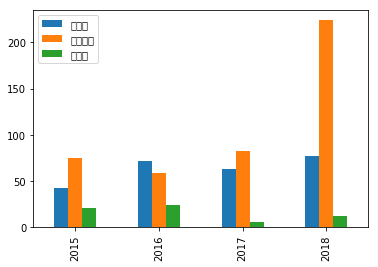

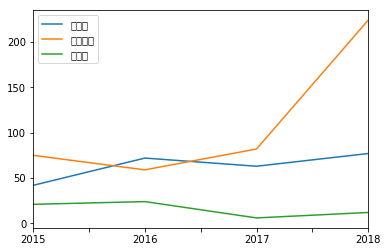

In [39]:
# 막대그래프
result_df.T.plot.bar()

# 라인그래프
result_df.T.plot.line()

## 특정 키워드 빈도수 및 트랜드 (그래프) : 특정 키워드 포함 문서 빈도수 및 트랜드 (그래프)
- keywords : 조사할 키워드 목록

In [43]:
# 시작년도, 끝년도 지정
start_year = 2015
end_year = 2018
num = 500
file_list = filtered_idx_result_df['file_list'].tolist()

result_df = pd.DataFrame()
result_df2 = pd.DataFrame()
keyword_list = ['친환경','초미세먼지','쓰레기']

for year in range(int(start_year),int(end_year)+1):
    result_list = [0]*len(keyword_list)
    result_list2 = [0]*len(keyword_list)
    
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (filtered_idx_result_df['date'] >= start_date) & (filtered_idx_result_df['date'] <= end_date)
    temp_filtered_idx_result_df = filtered_idx_result_df[dt_idx]
    
    s_ndocs = temp_filtered_idx_result_df.shape[0]
    file_list = temp_filtered_idx_result_df['file_list'].tolist()

    for i in range(len(file_list)):
        f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
        doc = f.read()
        f.close()
        corpus[i] = doc
        
        for kidx,k in enumerate(keyword_list):
            p = re.compile(k)
            ridx = p.search(doc)
            if(ridx != None):
                result_list[kidx] =  result_list[kidx] + 1
                result_list2[kidx] =  result_list2[kidx] + 1
                
    result_list2 = list(map(lambda x: x / (s_ndocs+1), result_list2))
    temp_df = pd.DataFrame(result_list,columns=[str(year)])
    temp_df2 = pd.DataFrame(result_list2,columns=[str(year)])
    
    result_df = pd.concat([result_df,temp_df],axis=1)
    result_df2 = pd.concat([result_df2,temp_df2],axis=1)
    
result_df.index=  keyword_list
result_df
result_df2.index=  keyword_list
result_df2

,2015,2016,2017,2018
친환경,16,17,12,24
초미세먼지,1,1,1,0
쓰레기,4,3,3,6


,2015,2016,2017,2018
친환경,0.140351,0.158879,0.100000,0.165517
초미세먼지,0.008772,0.009346,0.008333,0.000000
쓰레기,0.035088,0.028037,0.025000,0.041379


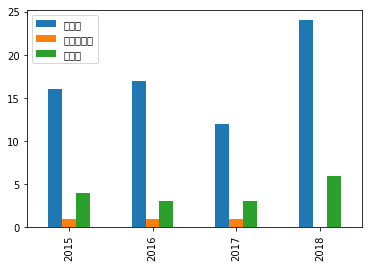

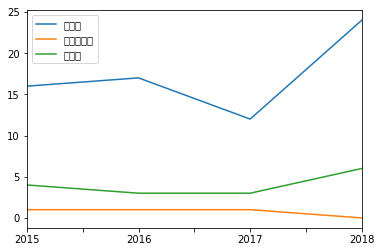

In [44]:
# 막대그래프
result_df.T.plot.bar()

# 라인그래프
result_df.T.plot.line()

## LDA 분석 : 토픽 모델링 분석
- topic_words 변수를 통해 각 주제별 단어 확인 가능

In [45]:
# 인자 설정
# Random Seed 값 설정, 이값에 따라 결과 달라짐
# 토픽 갯수, 리스트 타입으로 한번에 설정 [5,6,7] 등 한번에 실행도 가능

n_topics = [7]
random_seed = 1004
n_words = 50

file_list = filtered_idx_result_df['file_list'].tolist()
corpus = [""] * len(file_list)

# 파일 내용 읽어서 코퍼스에 저장

for i in range(len(file_list)):
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    f.close()
    corpus[i] = " ".join(twitter.nouns(doc))

# Stop words 
stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "분석", "구축","개발","정책","대책",
              "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
              "총회", "대한", "통해", "한국","국내","개최","행사","우수","서울","장관","호남권","피해","해외","일자리","박람회",
              "지원", "위해", "총회","국제","분야","환경기술"]

stop_words = list(set(stop_words))

vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 1),min_df=0.05,max_df=0.3)
X = vect.fit_transform(corpus)
X = TfidfTransformer().fit_transform(X)


for i in n_topics:
        
    # LDA 수횅
    lda = LatentDirichletAllocation(n_components = i,learning_method="batch",random_state=random_seed)
    document_topics = lda.fit_transform(X)

    sorting = np.argsort(lda.components_, axis=1)[:,::-1]
    feature_names = np.array(vect.get_feature_names())

    # 각 문서별 주제번호 할당
    topic_list = np.argmax(document_topics,axis=1).tolist()

    topic_words = pd.DataFrame(feature_names[sorting])
    topic_words = topic_words.T
    topic_words = topic_words[:n_words]

    # 파일경로 지정
    fpath =  "./lda_result/"  + "lda_result_n_" + str(i) + "_" + str(random_seed) + "_"

    # 파일 저장
    document_topics = pd.DataFrame(document_topics)
    document_topics.to_csv(fpath + "document_topic.csv",header=None,index=False,encoding="UTF8")
    topic_words.to_csv(fpath + "topic_words.csv",header=None,index=False,encoding="UTF8")

    # 시각화 및 저장
    pyldavis = pyLDAvis.sklearn.prepare(lda, X, vect)
    pyLDAvis.save_html(pyldavis,fpath + "lda.html")


C:\Users\NFSI172\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## LDA 연도별 추세 : 토픽 모델링 분포 분석
- 앞에서 topic_list 에는 각 문서의 주제 번호가 할당되어있음

In [46]:
# LDA 년도별 문서 분포 결과 출력

topic_list = pd.Series(topic_list)
result_df = pd.DataFrame()

for year in range(int(start_year),int(end_year)+1):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (filtered_idx_result_df['date'] >= start_date) & (filtered_idx_result_df['date'] <= end_date)
    sub_filtered_idx_result_df = filtered_idx_result_df[dt_idx]
    sub_topic_list = topic_list[dt_idx]
    
    result = []
    for t in range(max(topic_list) + 1):
        num = len(sub_topic_list[sub_topic_list==t])
        result.append(num)
    
    result = pd.Series(result,name=str(year))
    result_df = pd.concat([result_df,result],axis=1)            


# 비율로 만들기
result_df = result_df.T.apply(lambda x: x / x.sum(),axis=1)

In [47]:
result_df

,0,1,2,3,4
2015,0.159292,0.778761,0.0,0.0,0.061947
2016,0.226415,0.726415,0.0,0.0,0.047170
2017,0.285714,0.663866,0.0,0.0,0.050420
2018,0.097222,0.854167,0.0,0.0,0.048611


## LDA 토픽 비율 그래프 그리기
- https://dailyheumsi.tistory.com/98 참조

Text(0.07964601769911504, 0.0, '15.9')

Text(0.11320754716981132, 1.0, '22.6')

Text(0.14285714285714285, 2.0, '28.6')

Text(0.04861111111111111, 3.0, '9.7')

Text(0.5486725663716814, 0.0, '77.9')

Text(0.5896226415094339, 1.0, '72.6')

Text(0.6176470588235294, 2.0, '66.4')

Text(0.5243055555555556, 3.0, '85.4')

Text(0.0, 0.0, '0.0')

Text(0.0, 1.0, '0.0')

Text(0.0, 2.0, '0.0')

Text(0.0, 3.0, '0.0')

Text(0.0, 0.0, '0.0')

Text(0.0, 1.0, '0.0')

Text(0.0, 2.0, '0.0')

Text(0.0, 3.0, '0.0')

Text(0.9690265486725664, 0.0, '6.2')

Text(0.9764150943396226, 1.0, '4.7')

Text(0.9747899159663865, 2.0, '5.0')

Text(0.9756944444444444, 3.0, '4.9')

C:\Users\NFSI172\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothicOTF'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


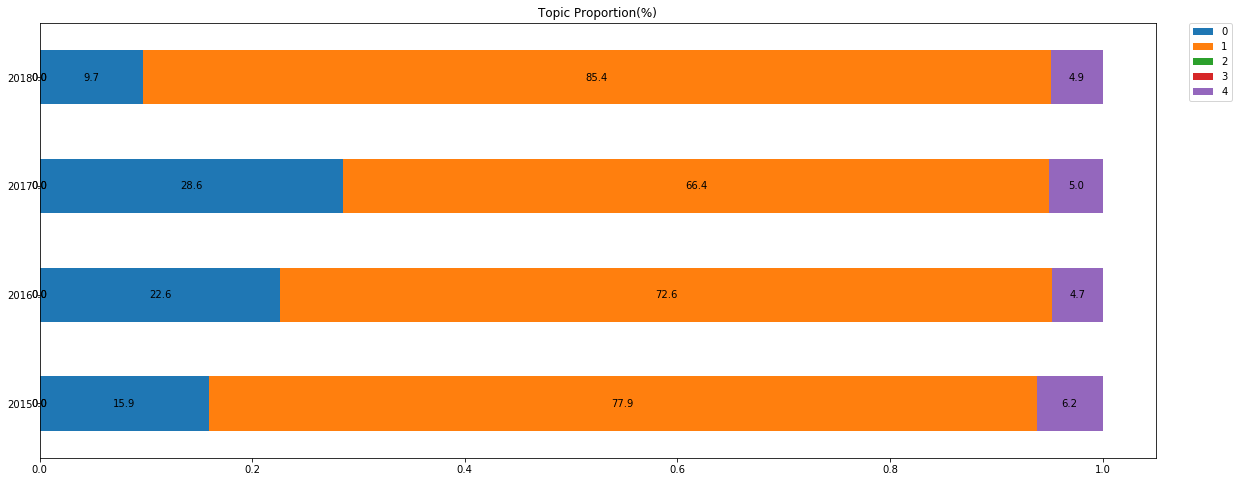

In [48]:
ax = result_df.plot.barh(stacked=True,legend=False,figsize=(20, 8), title="Topic Proportion(%)")
ax.legend(bbox_to_anchor=(1.03, 1),loc=2, borderaxespad=0.)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

## 연관 키워드 분석 (4가지 방법)
- 예시로 '친환경' 관련 연관 키워드 분석

In [49]:
# Word2vec 학습

file_list = filtered_idx_result_df['file_list'].tolist()
corpus = [""] * len(file_list)

# 파일 내용 읽어서 코퍼스에 저장
for i in range(len(file_list)):
    #print(i)
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    f.close()
    doc = re.sub('[^가-힝0-9a-zA-Z\\s]', '', doc)
    temp = twitter.nouns(doc)
    
    # 1글자 단어 제거
    widx_list = list(map(lambda x : len(x) > 1 ,temp))
    corpus[i] = list(np.array(temp)[widx_list])

model = Word2Vec(corpus)
model.init_sims(replace=True)
w2v_model = model

In [50]:
# 연관 키워드 분석을 수행할 단어 설정 
word = '친환경'
num = 30

## 연관 키워드 분석 1 : word2vec cosine similarity

In [51]:
result = pd.DataFrame(w2v_model.most_similar(word,topn=num))
result.to_csv("./w2v_result/" + "w2v_" + str(word) + ".csv",encoding="UTF8")
#reuslt

C:\Users\NFSI172\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


## 연관 키워드 분석 2 : 연관 단어가 특정단어 근처에서 나타날 확률

In [52]:
# 반드시 리스트 타입 사용
result2 = pd.DataFrame(w2v_model.predict_output_word([word], topn=num))
result2.to_csv("./w2v_result/" + "w2v2_"+ str(word) +  ".csv",encoding="UTF8")
#result2

## 연관 키워드 분석 3 : 키워드 포함 문장 추출 ⇒ 키워드 빈도수 분석

In [53]:
kkma = Kkma()
kkma.pos('')

[]

In [54]:
# 문장 최소길이
slen = 10

# 리스트 타입 사용

file_list = filtered_idx_result_df['file_list'].tolist()
filtered_sentences= []

for i in range(len(file_list)):
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    new_text = doc.replace(".",".\n").replace("?","?\n").replace("!","!\n")
    sentences = new_text.splitlines()

    for s in sentences:
        filtered_sentences.append(s)
        
temp_df = pd.DataFrame(filtered_sentences)
temp = []

# 특정단어가 포함된 문장만 추출
for s in filtered_sentences :
    p = re.compile(word)
    ridx = p.search(s)

    if(ridx == None):
        continue   
    s = s.strip()
    
    if len(s) > slen :
        temp.append(s)

filtered_sentences = temp

temp_df = pd.DataFrame(filtered_sentences)

# 파일 내용 읽어서 코퍼스에 저장

corpus = []     
for i in range(len(filtered_sentences)):
    corpus.append(" ".join(twitter.nouns(filtered_sentences[i])))

# Stop words 
stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "분석", "구축","개발","정책","대책",
              "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
              "총회", "대한", "통해", "한국","국내","개최","행사","우수","서울","장관","호남권","피해","해외","일자리","박람회",
              "지원", "위해", "총회","국제","분야","환경기술"]


vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.3)

X = vect.fit_transform(corpus)

count = X.toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]

co_word_list = list(zip(feature_name[:num], count[:num]))
co_word_list = pd.DataFrame(co_word_list)


co_word_list.to_csv("./sentence_level_cowords/" +  word + "_scowords" + ".csv",encoding="UTF8")
# co_word_list

## 연관 키워드 분석 4 : 키워드 포함 문서 추출 ⇒ 키워드 빈도수 분석

In [55]:
# 문서추출

file_list =  filtered_idx_result_df['file_list'].tolist()
temp_idx_result_df = pd.DataFrame()

fidx = []
didx = []

for i in range(len(file_list)):
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read() 

    p = re.compile(word)
    ridx = p.search(doc)

    if(ridx == None):
        next
    else:
        fidx.append(i)

fidx = list(set(fidx))

temp_idx_result_df = filtered_idx_result_df.iloc[fidx]
temp_idx_result_df = temp_idx_result_df.reset_index(drop=True)

file_list =  temp_idx_result_df['file_list'].tolist()

corpus = []     
for i in range(len(file_list)):
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    
    # 파일 내용 읽어서 코퍼스에 저장
    corpus.append(" ".join(twitter.nouns(doc)))
    f.close()

# Stop words 
stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "분석", "구축","개발","정책","대책",
              "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
              "총회", "대한", "통해", "한국","국내","개최","행사","우수","서울","장관","호남권","피해","해외","일자리","박람회",
              "지원", "위해", "총회","국제","분야","환경기술"]

stop_words = list(set(stop_words))


vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.3)

X = vect.fit_transform(corpus)

count = X.toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]

co_word_list = list(zip(feature_name[:num], count[:num]))
co_word_list = pd.DataFrame(co_word_list)

co_word_list.to_csv("./doc_level_cowords/" + word + "_cowords" + ".csv",encoding="UTF8")

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

## 문서 요약 알고리즘 (TextRank)
- 문서양이 많아지고, 문서길이가 속도가 급격하게 느려짐
- Cooccurence 행렬의 형태가 단어수*단어수 형태이어서 데이터가 엄청 커질수 있음
- 예시로 친환경 키워드가 포함된 제목에 대해서 요약 수행

In [ ]:
# 문장 요약 갯수 설정

cnt = 10
# 여기에서는 '친환경'이 포함된 제목만 활용하여 작업 수행

s_list = filtered_idx_result_df['title'].tolist()

result = []
fidx = []

for sidx in range(len(s_list)):
    p = re.compile(word)
    ridx = p.search(s_list[sidx])

    if(ridx == None):
        next
    else:
        fidx.append(sidx)
    
t_list = filtered_idx_result_df['title']
t_list = list(t_list.loc[fidx])


for idx,t in enumerate(t_list):
    t_list[idx] = re.sub('[^가-힝0-9a-zA-Z\\s]', '', t)

p_sentences = ". ".join(t_list)
textrank = TextRank(p_sentences)
t = textrank.summarize(count=cnt)
t = t.split("\n")

result = pd.DataFrame(t)
result.columns=['Sentences']
result.to_csv("./sentence_summary_result/" + "ss_" + "친환경" + ".csv",encoding="UTF8")

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

In [ ]:
result